 # SALES ANALYSIS in E-commerce 

# 1. Overview

## 1.1. Calling libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.express as px
from IPython.display import display

## 1.2. Reading Data

In [2]:
path = '/Users/huongnguyen/Desktop/sales2019/'
df = pd.read_csv(path + 'sales2019_1.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


# 1.3. CLEANING DATA AND PREPROCESSING

## 1.3.1. Merge 12-month data

In [3]:
frames = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
df = result
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


All sales file have been merged to the same table. Check whether it is correct or not by checking length of each files and df's total length after merging. 

In [4]:
frames = []
all_length = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
        len_1m=len(df1.index)
        all_length.append(len_1m)
df = result
print(sum(all_length))

186850


So sum(all_length) is the same a table below => Accurate merging.

In [5]:
df.to_csv('annualSales2019.csv', index=False)

In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [7]:
df.describe

<bound method NDFrame.describe of       Order ID                     Product Quantity Ordered Price Each  \
0       162009                      iPhone                1        700   
1       162009    Lightning Charging Cable                1      14.95   
2       162009            Wired Headphones                2      11.99   
3       162010  Bose SoundSport Headphones                1      99.99   
4       162011      34in Ultrawide Monitor                1     379.99   
...        ...                         ...              ...        ...   
12006   248146  Bose SoundSport Headphones                1      99.99   
12007   248147      AAA Batteries (4-pack)                3       2.99   
12008   248148       AA Batteries (4-pack)                1       3.84   
12009   248149        USB-C Charging Cable                1      11.95   
12010   248150       AA Batteries (4-pack)                1       3.84   

           Order Date                         Purchase Address  
0      03/28

## 1.3.2. Add "Month" columns

In [8]:
df['Month']=df['Order Date'].str[0:2]

In [9]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [10]:
print(set(df['Month']))

{'03', '09', '02', '11', '08', nan, '06', '10', '05', 'Or', '01', '12', '07', '04'}


There are "Nah" and "Or" in dataset. Get rid of "Nah" and "Or" now:

In [11]:
df=df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [12]:
df = df[df['Month']!= "Or"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


# II. EDA - QUESTION?

## 2.1. What was a best month for sales? how much this month earned?

All columns is Object. Next, change "Quantity Ordered", "Price Each" type:

In [13]:
df['Quantity Ordered']= pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each']= pd.to_numeric(df['Price Each'], downcast='float')

In [14]:
df['Sales']= df['Quantity Ordered']* df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,162009,iPhone,1,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.000000
1,162009,Lightning Charging Cable,1,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,14.950000
2,162009,Wired Headphones,2,11.990000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,23.980000
3,162010,Bose SoundSport Headphones,1,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.989998
4,162011,34in Ultrawide Monitor,1,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.989990


In [15]:
move_column = df.pop('Sales')
df.insert(4, 'Total Sales', move_column)
df

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03
...,...,...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.989998,99.989998,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",08
12007,248147,AAA Batteries (4-pack),3,2.990000,8.970000,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",08
12008,248148,AA Batteries (4-pack),1,3.840000,3.840000,08/02/19 07:25,"568 13th St, Seattle, WA 98101",08
12009,248149,USB-C Charging Cable,1,11.950000,11.950000,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",08


In [16]:
monthly_sales = df.groupby('Month')['Total Sales'].sum()
display(monthly_sales)

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Total Sales, dtype: float32

In [17]:
max_value = monthly_sales.max()
for month, sales in monthly_sales.items():
     if sales == max_value:
          print(month, sales)

12 4613443.5


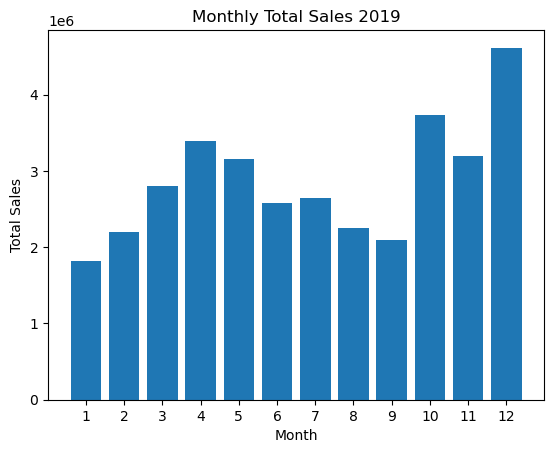

In [18]:
month = range(1,13)
plt.bar(x=month, height = monthly_sales)

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title("Monthly Total Sales 2019")

plt.xticks(month)
plt.show()

December is the month which has the highest sales of 4,613,443.5 dollars. Looking at the chart, we can see that the sales in the later months of the year are higher compared to the beginning and middle of the year. The end of the year is the time of the holiday season (e.g., Christmas, New Year, etc.), and we may consider that the seasonal factor influences total sales.


## 2.2. Which city has the highest sales?

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


There is no seperate city columns, need to split city from 'Purchase Adress' - using lambda to split

In [20]:
city_split = lambda address:address.split(',')[1]

In [21]:
df['City'] = df['Purchase Address'].apply(city_split)
df

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Purchase Address,Month,City
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco
...,...,...,...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.989998,99.989998,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",08,San Francisco
12007,248147,AAA Batteries (4-pack),3,2.990000,8.970000,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",08,Boston
12008,248148,AA Batteries (4-pack),1,3.840000,3.840000,08/02/19 07:25,"568 13th St, Seattle, WA 98101",08,Seattle
12009,248149,USB-C Charging Cable,1,11.950000,11.950000,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",08,San Francisco


In [22]:
city_sales = df.groupby('City')['Total Sales'].sum()
city_sales

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Total Sales, dtype: float32

In [23]:
city_sales.max()

8262204.0

In [24]:
cities = df['City'].unique()

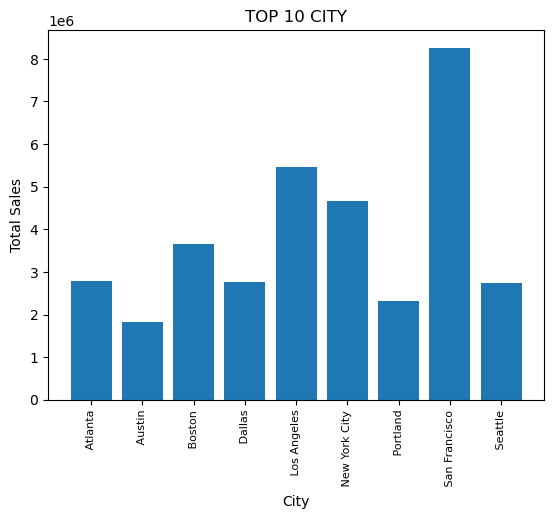

In [25]:
plt.bar( x= sorted(cities), height = city_sales)

plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title("TOP 10 CITY")

plt.xticks(cities, rotation = 90, size=8)
plt.show()

San Francisco is the city with the highest revenue in the region. The bar chart also highlights the top 10 cities with leading sales figures. Predicting factors that may influence revenue, such as population, occupations of customers in this area, customer preferences, etc.



## 2.3. What time should we display ads to maximize the likelihood of customer's buying product?

In [26]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Purchase Address,Month,City
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco


In [27]:
print(df['Order Date'].dtypes)

object


In [28]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [29]:
df['Hour']=df['Order Date'].dt.hour

In [30]:
df

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Purchase Address,Month,City,Hour
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,San Francisco,0
...,...,...,...,...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.989998,99.989998,2019-08-29 22:19:00,"868 Hickory St, San Francisco, CA 94016",08,San Francisco,22
12007,248147,AAA Batteries (4-pack),3,2.990000,8.970000,2019-08-31 16:26:00,"206 Lakeview St, Boston, MA 02215",08,Boston,16
12008,248148,AA Batteries (4-pack),1,3.840000,3.840000,2019-08-02 07:25:00,"568 13th St, Seattle, WA 98101",08,Seattle,7
12009,248149,USB-C Charging Cable,1,11.950000,11.950000,2019-08-08 12:10:00,"495 Walnut St, San Francisco, CA 94016",08,San Francisco,12


### 2.3.1. Total Sales within the hour

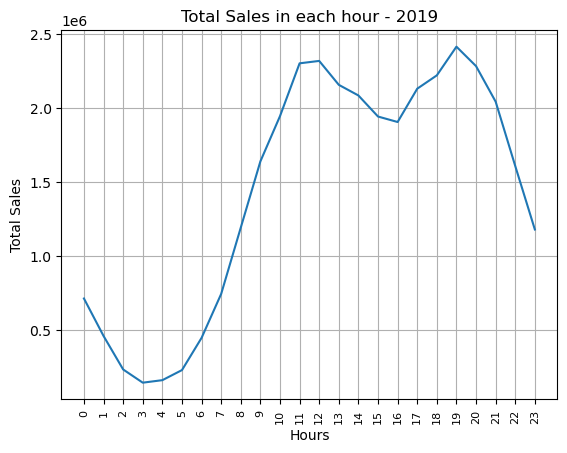

In [31]:
sales_hour = df.groupby('Hour')['Total Sales'].sum()
hours = [hour for hour, sales in sales_hour.items()]
plt.plot(hours,sales_hour)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Total Sales')
plt.title("Total Sales in each hour - 2019")

plt.xticks(hours, rotation = 90, size=8)
plt.show()

### 2.3.2. Total Orders within the hour. 

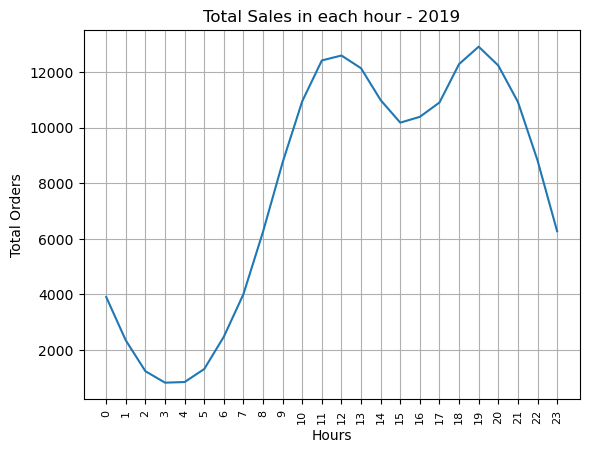

In [32]:
orders_hour = df.groupby('Hour')['Total Sales'].count()
hours = [hour for hour, sales in orders_hour.items()]
plt.plot(hours,orders_hour)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Total Orders')
plt.title("Total Sales in each hour - 2019")

plt.xticks(hours, rotation = 90, size=8)
plt.show()

The peak buying time frame from about 11:00-13:00 (lunch time) and about 18:00-20:00 (evening). Thus, we can choose the ad display time to be about 30 minutes before the peak shopping time frame. However, in order to be able to choose a more accurate time frame for displaying ads in each city, an analysis of the time frame by city will be performed on request.



## 2.4. Which products are most often sold together?

In [33]:
from itertools import combinations
from collections import Counter

In [34]:
df_dup = df[df['Order ID'].duplicated(keep = False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Purchase Address,Month,City,Hour
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
30,162037,iPhone,1,700.00,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2
31,162037,Lightning Charging Cable,1,14.95,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2


In [35]:
df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df_dup.head()


/private/tmp/PKInstallSandbox.iEkjWu/tmp/ipykernel_1500/2018986561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Purchase Address,Month,City,Hour,All Product
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
30,162037,iPhone,1,700.00,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2,"iPhone, Lightning Charging Cable"
31,162037,Lightning Charging Cable,1,14.95,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2,"iPhone, Lightning Charging Cable"


In [36]:
df_dup[['Order ID', 'All Product']].drop_duplicates()
df_dup

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Purchase Address,Month,City,Hour,All Product
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
30,162037,iPhone,1,700.000000,700.000000,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2,"iPhone, Lightning Charging Cable"
31,162037,Lightning Charging Cable,1,14.950000,14.950000,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2,"iPhone, Lightning Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...
11946,248088,Bose SoundSport Headphones,1,99.989998,99.989998,2019-08-13 19:26:00,"614 11th St, San Francisco, CA 94016",08,San Francisco,19,"ThinkPad Laptop, Bose SoundSport Headphones"
11963,248105,Google Phone,1,600.000000,600.000000,2019-08-28 19:27:00,"21 Center St, New York City, NY 10001",08,New York City,19,"Google Phone, Wired Headphones"
11964,248105,Wired Headphones,1,11.990000,11.990000,2019-08-28 19:27:00,"21 Center St, New York City, NY 10001",08,New York City,19,"Google Phone, Wired Headphones"
11979,248120,Google Phone,1,600.000000,600.000000,2019-08-02 20:42:00,"619 5th St, New York City, NY 10001",08,New York City,20,"Google Phone, USB-C Charging Cable"


In [37]:
count = Counter()

for products in df_dup['All Product']:
    product_list = products.split(",")
    count.update(Counter(combinations(product_list, 2)))

print(count)

Counter({('iPhone', ' Lightning Charging Cable'): 2140, ('Google Phone', ' USB-C Charging Cable'): 2116, ('iPhone', ' Wired Headphones'): 987, ('Google Phone', ' Wired Headphones'): 949, ('iPhone', ' Apple Airpods Headphones'): 799, ('Vareebadd Phone', ' USB-C Charging Cable'): 773, ('Google Phone', ' Bose SoundSport Headphones'): 503, (' USB-C Charging Cable', ' Wired Headphones'): 372, ('Vareebadd Phone', ' Wired Headphones'): 327, (' Lightning Charging Cable', ' Wired Headphones'): 193, ('Vareebadd Phone', ' Bose SoundSport Headphones'): 182, (' USB-C Charging Cable', ' Bose SoundSport Headphones'): 159, (' Lightning Charging Cable', ' Apple Airpods Headphones'): 146, ('Lightning Charging Cable', ' USB-C Charging Cable'): 110, ('Lightning Charging Cable', ' AA Batteries (4-pack)'): 104, ('Lightning Charging Cable', ' Lightning Charging Cable'): 102, ('AA Batteries (4-pack)', ' Lightning Charging Cable'): 102, ('AAA Batteries (4-pack)', ' USB-C Charging Cable'): 100, ('AAA Batteries 

In [38]:
sorted_count = dict(sorted(count.items(), key=lambda x: x[1], reverse=True))
top_n = 10 
for pair, count in list(sorted_count.items())[:top_n]:
    print(f'Product Pair: {pair}, Count: {count}')

Product Pair: ('iPhone', ' Lightning Charging Cable'), Count: 2140
Product Pair: ('Google Phone', ' USB-C Charging Cable'), Count: 2116
Product Pair: ('iPhone', ' Wired Headphones'), Count: 987
Product Pair: ('Google Phone', ' Wired Headphones'), Count: 949
Product Pair: ('iPhone', ' Apple Airpods Headphones'), Count: 799
Product Pair: ('Vareebadd Phone', ' USB-C Charging Cable'), Count: 773
Product Pair: ('Google Phone', ' Bose SoundSport Headphones'), Count: 503
Product Pair: (' USB-C Charging Cable', ' Wired Headphones'), Count: 372
Product Pair: ('Vareebadd Phone', ' Wired Headphones'), Count: 327
Product Pair: (' Lightning Charging Cable', ' Wired Headphones'), Count: 193


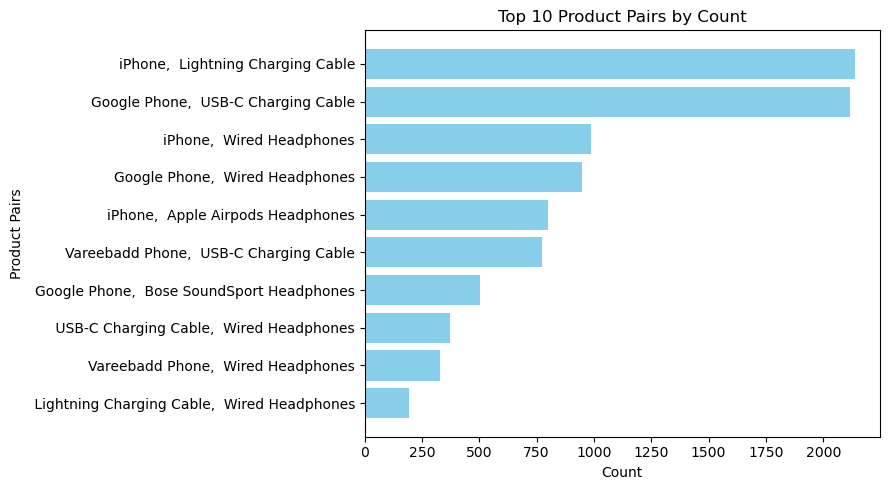

In [39]:
top_pairs = list(sorted_count.items())[:top_n]
product_pairs = [pair[0] for pair in top_pairs]
counts = [pair[1] for pair in top_pairs]
product_pairs_str = [', '.join(pair) for pair in product_pairs]
# Create a bar chart
plt.figure(figsize=(9, 5))
plt.barh(product_pairs_str, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Product Pairs')
plt.title('Top 10 Product Pairs by Count')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

Above are the top 10 best-selling products that are often sold together. This data can be used to combine best-selling products with less-selling products to boost revenue.


## 2.5. What product sold the most? What factors contribute to the high sales of that Product?

In [40]:
df['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       'Bose SoundSport Headphones', '34in Ultrawide Monitor',
       'AA Batteries (4-pack)', 'USB-C Charging Cable',
       'AAA Batteries (4-pack)', 'LG Washing Machine',
       'Apple Airpods Headphones', '27in 4K Gaming Monitor',
       'Google Phone', 'Macbook Pro Laptop', '27in FHD Monitor',
       'ThinkPad Laptop', 'Vareebadd Phone', 'Flatscreen TV',
       '20in Monitor', 'LG Dryer'], dtype=object)

In [41]:
product_sold = df.groupby('Product')['Quantity Ordered'].sum()
product_sold

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

Consider some factors can distribute to the highest sales of Product such as Price, Brand or Quality. However, there are no data about Brand or Quality. So i will consider Price in this analysis. Extrating the average Price for each product. 

In [42]:
prices = df.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.990021
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.990021
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

In [43]:
product_name = [product for product, quant in product_sold.items()]
product_name

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

Show visualization to see distribute of price to product's sales. 

/private/tmp/PKInstallSandbox.iEkjWu/tmp/ipykernel_1500/4148133973.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_name,rotation =90, size=8)


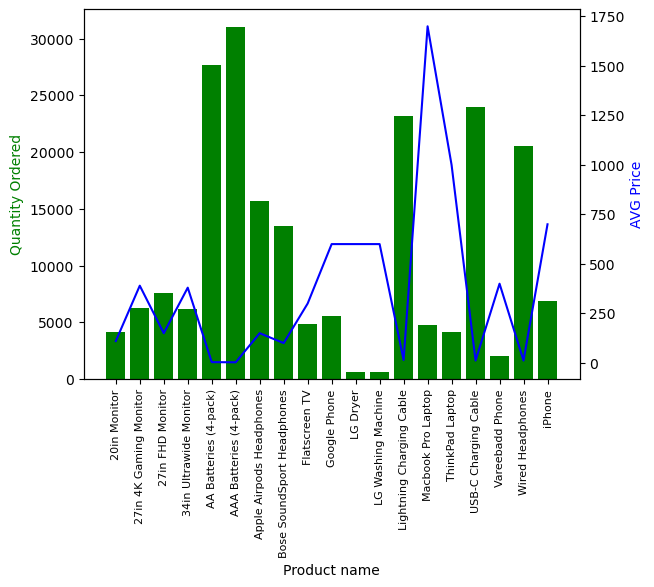

In [44]:
x= product_name
y1 = product_sold
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x,y1, color='g')
ax2.plot(x,y2, 'b-')

ax1.set_xticklabels(product_name,rotation =90, size=8)
ax1.set_xlabel("Product name")
ax1.set_ylabel('Quantity Ordered', color ='g')
ax2.set_ylabel('AVG Price', color ='b')
plt.show()

Looking at the chart, we can see that price affects the sales of products. Low price means high sales and vice versa. However, some products, although priced at an average level, have very low sales such as 27in 4K Gaming Monitor and Google Phone products, etc. So we need to consider brand factors and product quality reviews from previous users. 
